In [15]:
#Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [16]:
dataset = "C:/Users/SHIVAM SINGH/Downloads/Detection"

**Visualize X-ray images**

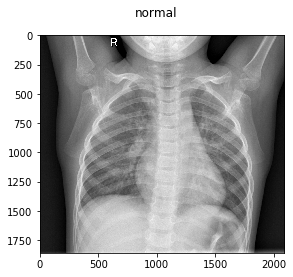

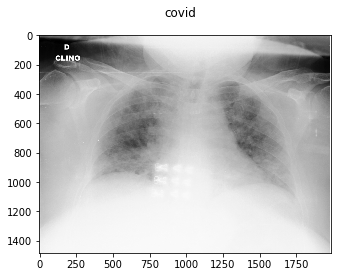

In [17]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(dataset + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(dataset + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray')

In [18]:
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [19]:
training_data=data_generator.flow_from_directory(
    dataset,
    seed=42,
    target_size=(200,200),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Validation_data=data_generator.flow_from_directory(
    dataset,
    seed=42,
    target_size=(200,200),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 76 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [20]:
#using tensorflow sequential model
seq_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [21]:
seq_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [22]:
seq_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

In [23]:
history=seq_model.fit_generator(
    training_data,
    epochs=20,
    validation_data=Validation_data)

Epoch 1/20
3/3 [==============================] - 6s 2s/step - loss: 4.6297 - acc: 0.6579 - val_loss: 1.4993 - val_acc: 0.2778
Epoch 2/20
3/3 [==============================] - 5s 2s/step - loss: 1.2086 - acc: 0.5395 - val_loss: 0.6871 - val_acc: 0.3333
Epoch 3/20
3/3 [==============================] - 5s 2s/step - loss: 0.5090 - acc: 0.6447 - val_loss: 0.5627 - val_acc: 0.7222
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.5889 - acc: 0.7368 - val_loss: 0.6148 - val_acc: 0.8889
Epoch 5/20
3/3 [==============================] - 5s 2s/step - loss: 0.5856 - acc: 0.7105 - val_loss: 0.7219 - val_acc: 0.7222
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.8865 - acc: 0.6579 - val_loss: 0.3392 - val_acc: 0.9444
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 2.2314 - acc: 0.8421 - val_loss: 0.4880 - val_acc: 0.7778
Epoch 8/20
3/3 [==============================] - 6s 2s/step - loss: 0.5125 - acc: 0.8026 - val_loss: 0.3549 - 

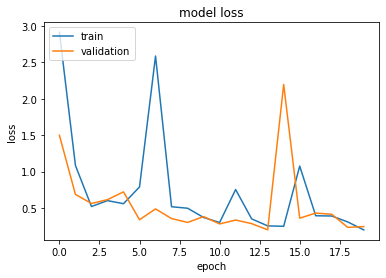

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

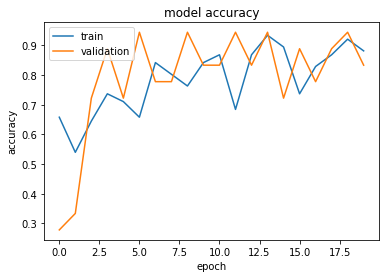

In [25]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
# Model evaluation

scores_train = seq_model.evaluate(training_data,verbose=1)
scores_validation = seq_model.evaluate(Validation_data,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))

1/1 [==============================] - 2s 2s/step - loss: 0.2196 - acc: 0.8889
Train Accuracy: 88.16%
Validation Accuracy: 88.89%


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = seq_model.predict_generator(Validation_data)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(Validation_data.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['normal', 'covid']
print(classification_report(Validation_data.classes, y_pred, target_names=target_names))

Confusion Matrix
[[12  1]
 [ 3  2]]
Classification Report
              precision    recall  f1-score   support

      normal       0.80      0.92      0.86        13
       covid       0.67      0.40      0.50         5

    accuracy                           0.78        18
   macro avg       0.73      0.66      0.68        18
weighted avg       0.76      0.78      0.76        18



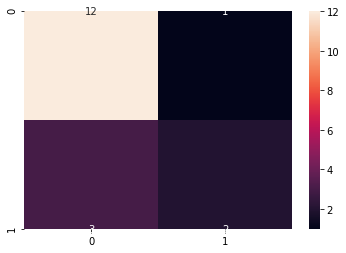

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot = True)

In [29]:
seq_model.save('covid_classifier')

In [30]:
#For Predicting on single Image
from keras.preprocessing import image
test_image = image.load_img('C:/Users/SHIVAM SINGH/Downloads/Detection/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', target_size = (200,200,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = seq_model.predict(test_image)
answer = seq_model.predict_classes(test_image)
training_data.class_indices
if result[0][0]==1:
    prediction = 'covid'
else :
    prediction = 'normal'
print(prediction)

covid
